# Assignment 3a: Exploring the trends in Nobel Prizes throughout the time (1901-2017)

In this assignemnt, we will be exploring trends in Nobel Prizes and geographic distribution of Nobel laureates over time. More specifically, we will be looking at Nobel Peace Prizes trends (1), and geographic distribution of the laureates (2).

First, we need to import the Pandas library.

In [69]:
import pandas as pd

After we import the Pandas library, we can adjust the display settings, tailoring them to our needs.

In [70]:
pd.options.display.max_rows = 25
pd.options.display.max_columns = 25

Now we need to upload our dataset. 

In [71]:
nobel_prize_winners = pd.read_csv('nobel-prize-winners.csv', delimiter=",", encoding='utf-8')

It will be interesting to look at 20 random rows of the dataset to see how it looks like.


In [72]:
nobel_prize_winners.sample(20)

,name,born,died,bornCountry_original,bornCountry_now,bornCity_original,bornCity_now,bornLocation,bornLong,bornLat,bornCoordinates,diedCountry_original,...,diedCity_now,diedLocation,diedLong,diedLat,diedCoordinates,gender,year,category,motivation,institutionName,institutionCity,institutionCountry
19,Johannes Stark,1874-04-15,1957-06-21,Germany,Germany,Schickenhof,Schickenhof,"Schickenhof, Germany",11.087408,49.455849,"49.4558488, 11.0874083",West Germany (now Germany),...,Traunstein,"Traunstein, Germany",12.638404,47.867757,"47.8677574, 12.6384037",male,1919,physics,"""for his discovery of the Doppler effect in ca...",Greifswald University,Greifswald,Germany
595,Tomas Lindahl,1938-01-28,0000-00-00,Sweden,Sweden,Stockholm,Stockholm,"Stockholm, Sweden",18.068581,59.329324,"59.3293235, 18.0685808",NaN,...,NaN,NaN,NaN,NaN,NaN,male,2015,chemistry,"""for mechanistic studies of DNA repair""",Clare Hall Laboratory,Hertfordshire,United Kingdom
436,Kip S. Thorne,1940-06-01,0000-00-00,USA,USA,"Logan, UT","Logan, UT","Logan, UT, USA",-111.833836,41.736980,"41.7369803, -111.8338359",NaN,...,NaN,NaN,NaN,NaN,NaN,male,2017,physics,"""for decisive contributions to the LIGO detect...",California Institute of Technology (Caltech),"Pasadena, CA",USA
1,Dag Hjalmar Agne Carl Hammarskjöld,1905-07-29,1961-09-18,Sweden,Sweden,Jönköping,Jönköping,"Jönköping, Sweden",14.161788,57.782614,"57.7826137, 14.1617876",Northern Rhodesia (now Zambia),...,Ndola,"Ndola, Zambia",28.649814,-12.990641,"-12.9906407, 28.6498144",male,1961,peace,NaN,NaN,NaN,NaN
403,Saul Perlmutter,0000-00-00,0000-00-00,USA,USA,"Champaign-Urbana, IL","Champaign-Urbana, IL","Champaign-Urbana, IL, USA",-88.207270,40.110588,"40.1105875, -88.2072697",NaN,...,NaN,NaN,NaN,NaN,NaN,male,2011,physics,"""for the discovery of the accelerating expansi...",University of California,"Berkeley, CA",USA
242,William Parry Murphy,1892-02-06,1987-10-09,USA,USA,"Stoughton, WI","Stoughton, WI","Stoughton, WI, USA",-89.217894,42.916946,"42.9169462, -89.2178937",USA,...,"Brookline, MA","Brookline, MA, USA",-71.121163,42.331764,"42.3317642, -71.1211635",male,1934,medicine,"""for their discoveries concerning liver therap...",Peter Brent Brigham Hospital,"Boston, MA",USA
308,Martin Luther King Jr.,1929-01-15,1968-04-04,USA,USA,"Atlanta, GA","Atlanta, GA","Atlanta, GA, USA",-84.387982,33.748995,"33.7489954, -84.3879824",USA,...,"Memphis, TN","Memphis, TN, USA",-90.048980,35.149534,"35.1495343, -90.0489801",male,1964,peace,NaN,NaN,NaN,NaN
375,Andrew Z. Fire,1959-04-27,0000-00-00,USA,USA,"Stanford, CA","Stanford, CA","Stanford, CA, USA",-122.166076,37.424106,"37.424106, -122.1660756",NaN,...,NaN,NaN,NaN,NaN,NaN,male,2006,medicine,"""for their discovery of RNA interference - gen...",Stanford University School of Medicine,"Stanford, CA",USA
556,Walter Rudolf Hess,1881-03-17,1973-08-12,Switzerland,Switzerland,Frauenfeld,Frauenfeld,"Frauenfeld, Switzerland",8.898754,47.553600,"47.5535997, 8.8987541",Switzerland,...,Ascona,"Ascona, Switzerland",8.775013,46.161579,"46.1615793, 8.7750131",male,1949,medicine,"""for his discovery of the functional organizat...",University of Zurich,Zurich,Switzerland
39,Aung San Suu Kyi,1945-06-19,0000-00-00,Burma (now Myanmar),Myanmar,Rangoon (now Yangon),Yangon,"Yangon, Myanmar",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,female,1991,peace,"""for her non-violent struggle for democracy an...",NaN,NaN,NaN


# Preliminary investigation of general trends

Now we are going to do the preliminary part of this research - investigate the general trends in Nobel Prizes distribution over time. To begin with, let's group the data by year and category and count the number of prizes in each group.

In [73]:
grouped_data = nobel_prize_winners.groupby(['year', 'category']).size().reset_index(name='count')


With the relevant data grouped, we create a pivot table to analyze the details that are relevant to the research question.

In [74]:
pivot_table = grouped_data.pivot(index='year', columns='category', values='count')


Displaying the first few rows of the pivot table to check the result.

In [75]:
print(pivot_table.head())


category  chemistry  economics  literature  medicine  peace  physics
year                                                                
1901            1.0        NaN         1.0       1.0    2.0      1.0
1902            1.0        NaN         1.0       1.0    2.0      2.0
1903            1.0        NaN         1.0       1.0    1.0      3.0
1904            1.0        NaN         2.0       1.0    NaN      1.0
1905            1.0        NaN         1.0       1.0    1.0      1.0


Now that we see that the pivot table is working properly, we can print the whole table to make preliminary conclusions about the distribution of Nobel Prizes per category over the years.

In [76]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pivot_table)

category  chemistry  economics  literature  medicine  peace  physics
year                                                                
1901            1.0        NaN         1.0       1.0    2.0      1.0
1902            1.0        NaN         1.0       1.0    2.0      2.0
1903            1.0        NaN         1.0       1.0    1.0      3.0
1904            1.0        NaN         2.0       1.0    NaN      1.0
1905            1.0        NaN         1.0       1.0    1.0      1.0
1906            1.0        NaN         1.0       2.0    1.0      1.0
1907            1.0        NaN         1.0       1.0    2.0      1.0
1908            1.0        NaN         1.0       3.0    2.0      1.0
1909            1.0        NaN         1.0       1.0    2.0      2.0
1910            1.0        NaN         1.0       1.0    NaN      1.0
1911            1.0        NaN         1.0       1.0    2.0      1.0
1912            2.0        NaN         1.0       1.0    1.0      1.0
1913            1.0        NaN    

As we can see in the full table, in some years the Nobel Prizes in certain categories were not awarded at all. For instance, the first prize in economics was awarded only in 1969. There were also significant breaks in awarding Nobel Peace Prize, which could happen due to the historical event occuring at those times. 
We can visualize the Nobel Price distribution throughout the years using a plot.

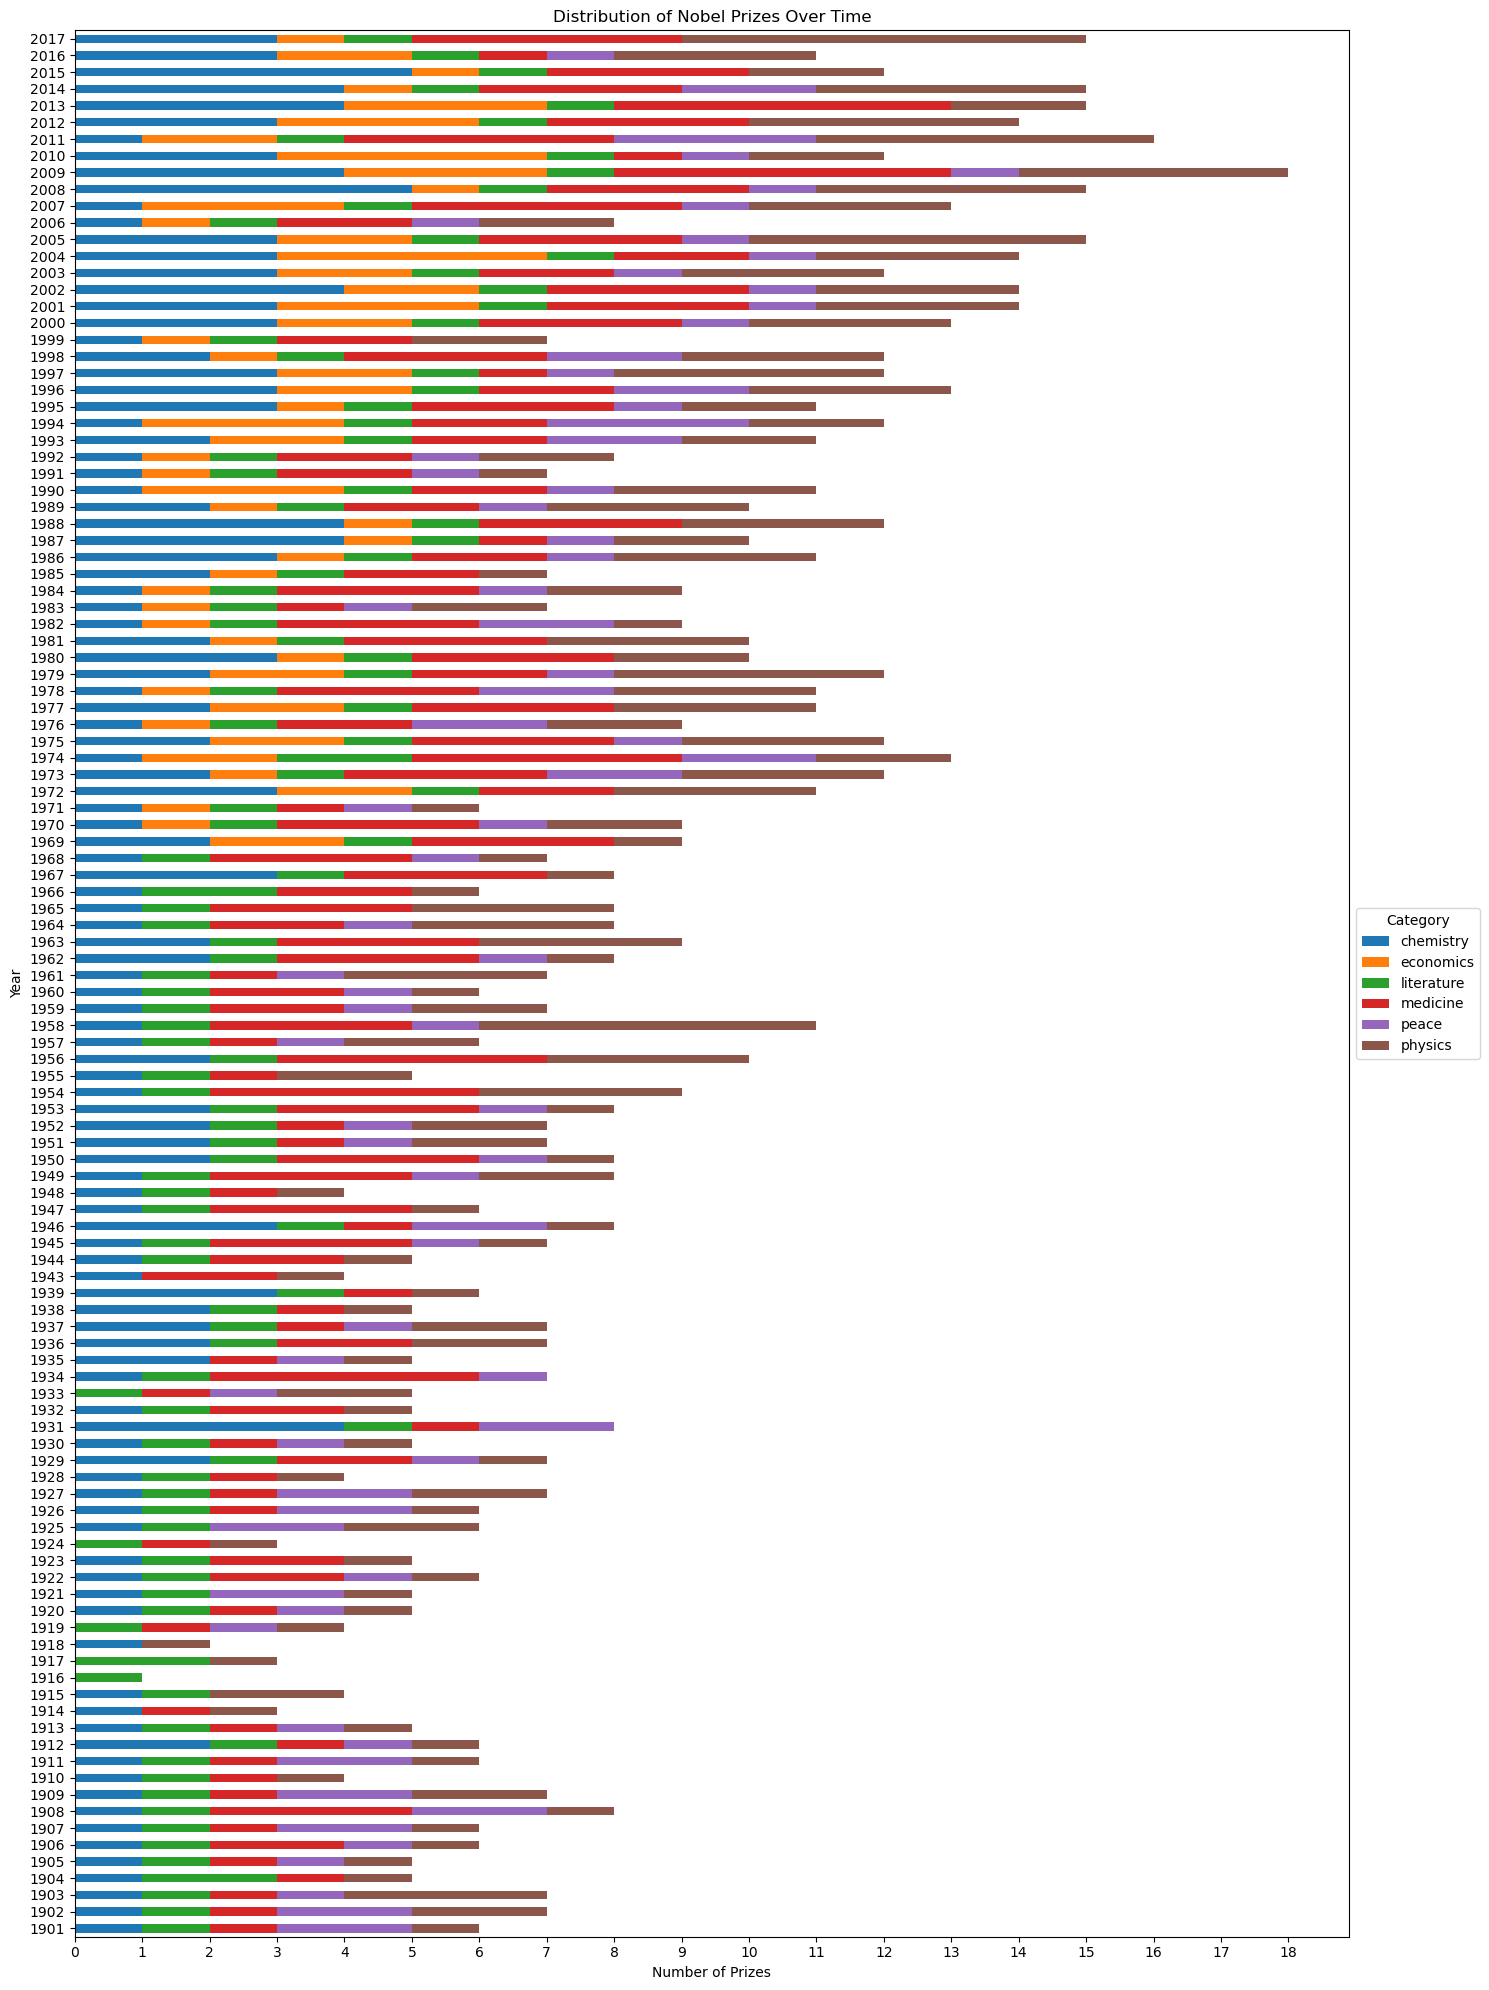

In [77]:
import matplotlib.pyplot as plt

# Increase the figure size
fig, ax = plt.subplots(figsize=(15, 20))

# Create the horizontal stacked bar plot
pivot_table.plot(kind='barh', stacked=True, ax=ax, title="Distribution of Nobel Prizes Over Time")

# Move the legend outside of the plot area
ax.legend(title="Category", loc='center left', bbox_to_anchor=(1, 0.5))

# Add labels to the axes
plt.xlabel("Number of Prizes")
plt.ylabel("Year")

# Set custom x-axis ticks 
max_prizes = int(pivot_table.sum(axis=1).max())  # Find the maximum number of prizes in a year
ax.set_xticks(range(0, max_prizes + 1))  # Set ticks from 0 to max_prizes with a step of 1

# Adjust the layout and show the plot
plt.tight_layout()  
plt.show()


This plot helps us discover and analyze different trends in Nobel Prize awarding. For instance, we can see the minimum and maximum Nobel Prizes awarded from 1901 to 2017. In 1916, only one Nobel Prize in Literature was awarded, whereas in 2009 there were 17 laureates, with 4 awards in Chemistry, 3 in Economics, 5 awards in Medicine, 
1 Nobel Peace Prize and 4 awards in Physics. Now that we have the general visualization, we can make a more detailed research. 

For example, we can see that the purple color (Peace) is the least dominant (except for Economics that was not introduced before 1969) in the chart, so it would be interesting to investigate the distribution of the Nobel Peace Prizes. To make sure that we are correct about the assumption that the number of Nobel Peace Prizes is smaller than the number of Prizes in different categories, we can make a pie chart.


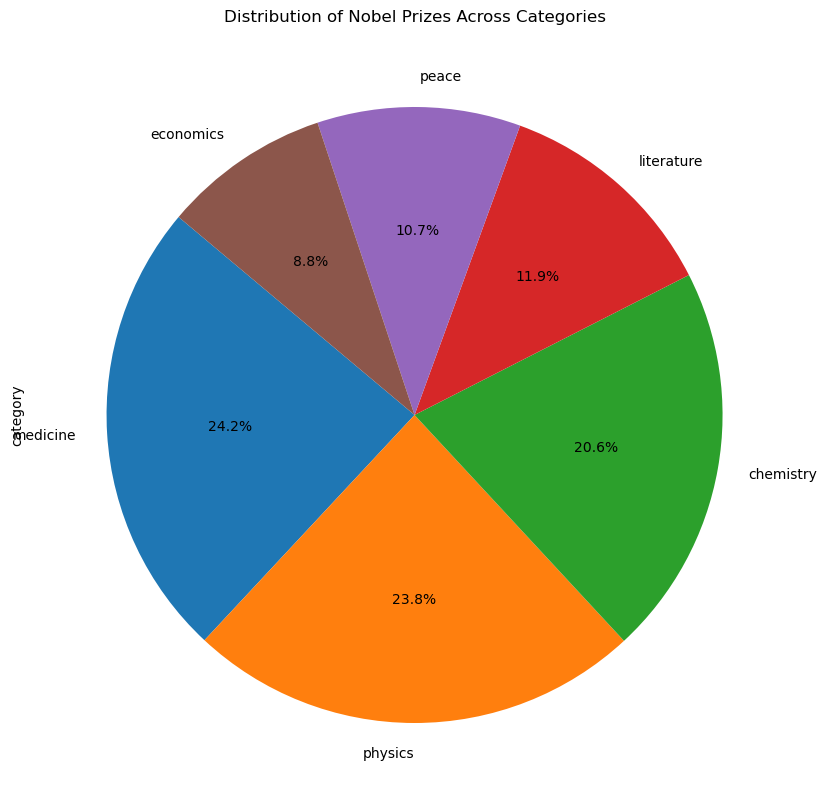

In [78]:
# Group the data by category and count the number of prizes
category_counts = nobel_prize_winners['category'].value_counts()

# Create the pie chart with percentages
plt.figure(figsize=(10, 10))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nobel Prizes Across Categories')

# Show the plot
plt.show()


# Question 1: Nobel Peace Prizes trends

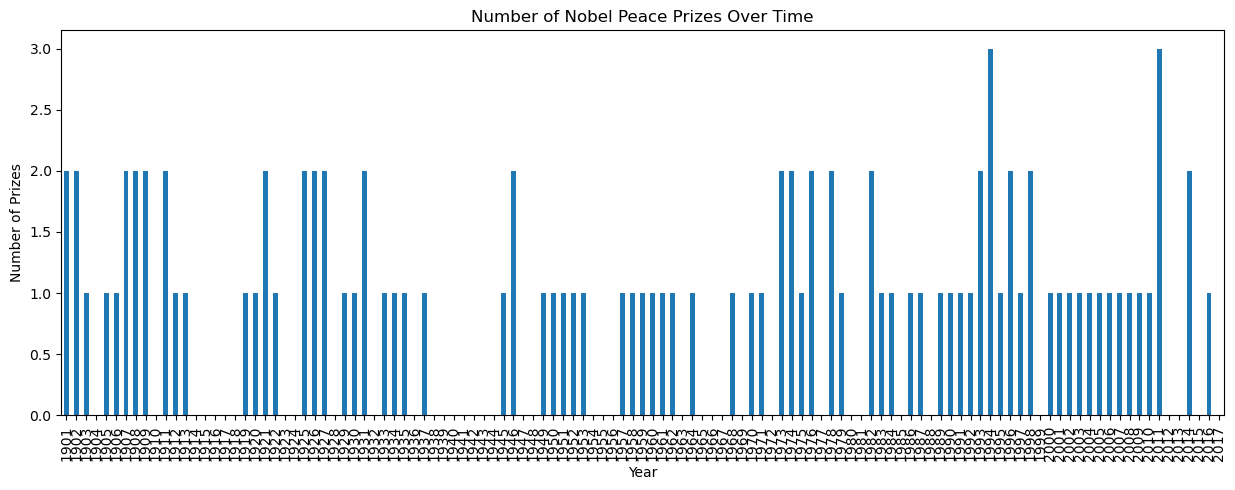

In [81]:
# Filter the dataset for Nobel Peace Prizes
peace_prizes = nobel_prize_winners[nobel_prize_winners['category'] == 'peace']

# Group by year and count the number of prizes
peace_trend = peace_prizes.groupby('year').size()

# Determine the complete range of years
all_years = range(nobel_prize_winners['year'].min(), nobel_prize_winners['year'].max() + 1)

# Reindex the series to include all years, filling missing values with 0
peace_trend = medicine_trend.reindex(all_years, fill_value=0)

# Plotting the trend
peace_trend.plot(kind='bar', figsize=(15, 5), title="Number of Nobel Peace Prizes Over Time")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Prizes")

# Show the plot
plt.show()


As we mentioned earlier, there are significant breaks in years in which the Nobel Peace prize was awarded. For instance, from 1914 to 1918, and 1938 to 1944, and several more. People interested in history can probably notice see that the dates allign with historical events - WWI and WWII, Mahatma Ghandi assasination in 1948, etc. 


# Question 2: Geographic distribution of the Nobel Prize laureates

In this part we will be looking at the locations in which most Nobel Prize laureates were born. 

In [59]:
# Group the data by country and count the number of laureates
grouped_data2 = nobel_prize_winners['bornLocation'].value_counts()

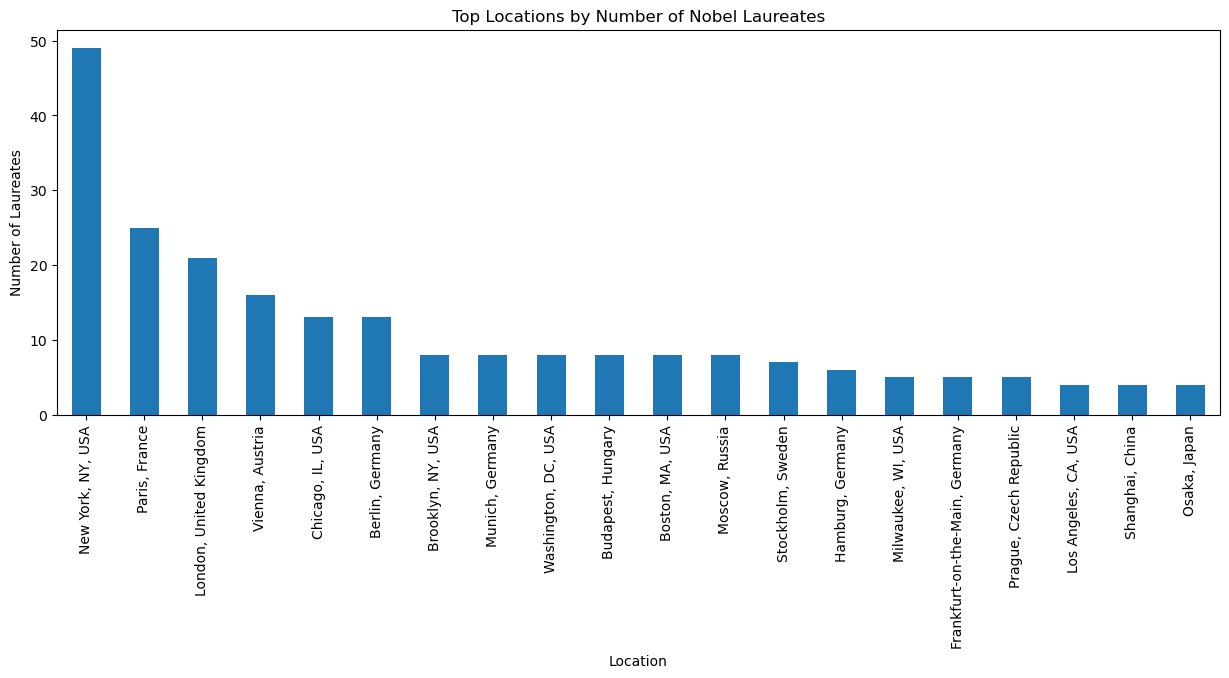

In [61]:
# Create a bar chart for the top locations
top_countries = grouped_data2.head(20)  # Adjust this number as needed
top_countries.plot(kind='bar', figsize=(15, 5), title="Top Locations by Number of Nobel Laureates")

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Number of Laureates")

# Show the plot
plt.show() 


Now we have the general overview of the top locations where Nobel Prize laureates were born. Since we were already analyzing the data about Nobel Peace Prize winners earlier, let's look at where most of the laureates in this category were born.

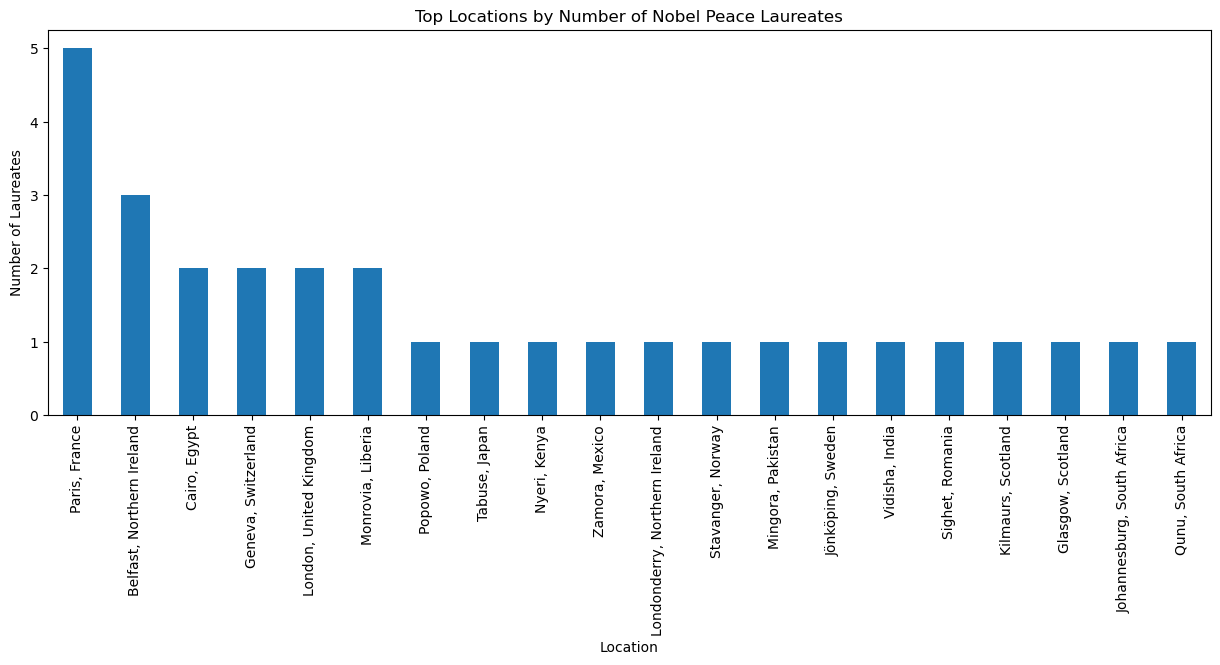

In [80]:
# Filter the dataset for Nobel Peace Prize laureates
peace_prize_laureates = nobel_prize_winners[nobel_prize_winners['category'] == 'peace']

# Group the data by bornLocation and count the number of laureates
peace_laureates_by_location = peace_prize_laureates['bornLocation'].value_counts()

# Create a bar chart for the top locations
top_peace_locations = peace_laureates_by_location.head(20)  # Adjust the number as needed
top_peace_locations.plot(kind='bar', figsize=(15, 5), title="Top Locations by Number of Nobel Peace Laureates")

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Number of Laureates")

# Show the plot
plt.show()


In the first barplot (Top Locations by Number of Nobel Laureates) we can see 7 US locations, with NY being the top one. However, in the second barplot (Top Locations by Number of Nobel Prize Laureates) not a single top US location was included. We are not be considering the locations after the first six positions, since all locations except for the first six have only one Nobel Peace Prize laureate. 